In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
# Function to update the grid for each step in the animation
def update(frameNum, img, grid, N):
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
            # Compute the sum of the 8 neighbors of each cell
            total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                         grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                         grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                         grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N]))

            # Apply Conway's rules
            if grid[i, j] == 1:
                if (total < 2) or (total > 3):
                    newGrid[i, j] = 0
            else:
                if total == 3:
                    newGrid[i, j] = 1

    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img,

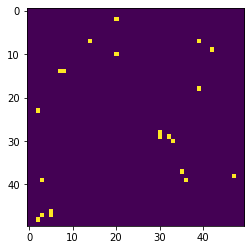

In [18]:
# Main function to initialize and run the animation
def main():
    # Define grid size and number of generations
    N = 50
    generations = 10

    # Initialize grid with random values
    grid = np.random.choice([0, 1], N*N, p=[0.2, 0.8]).reshape(N, N)
    # Set up the animation
    fig, ax = plt.subplots()
    img = ax.imshow(grid, interpolation='nearest')
    ani = animation.FuncAnimation(fig, update, fargs=(img, grid, N,),
                                  frames=generations, repeat=False, blit=True)
    plt.show()

if __name__ == '__main__':
    main()